In [2]:
# Importing basic dependencies

import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
# Read data
df = pd.read_csv('Reviews.csv')

In [5]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


### EDA and Data Preprocessing

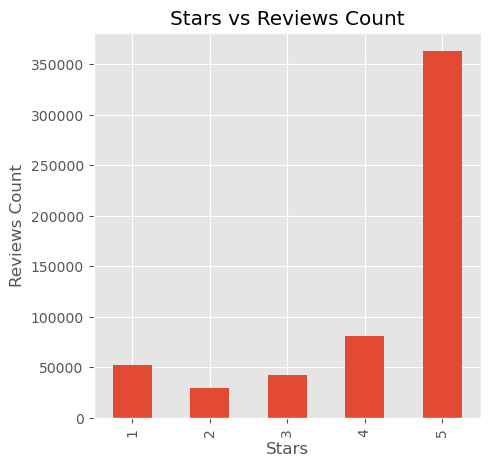

In [10]:
axis = df['Score'].value_counts().sort_index().plot(kind='bar', title='Stars vs Reviews Count', figsize=(5,5))
axis.set_xlabel('Stars')
axis.set_ylabel('Reviews Count')
plt.show()

#### We can see that most of the reviews are positive ( >= 4 stars ) which represents a generally satisfied customer base. 

#### Now let us search for spam reviews (which are very common) and they also skew the dataset, leading to incorrect predictions

In [15]:
count_of_reviews = df['Text'].value_counts().reset_index()
count_of_reviews

,index,Text
0,"This review will make me sound really stupid, ...",199
1,Diamond Almonds<br />Almonds are a good source...,126
2,"I have two cats, one 6 and one 2 years old. Bo...",51
3,The pet food industry can be one of the most i...,45
4,"I'm addicted to salty and tangy flavors, so wh...",42
...,...,...
393574,I started using this product in October and I ...,1
393575,"I don't know about the health benefits yet, I'...",1
393576,I love the taste of this oil. My wife hates th...,1
393577,"Love, love LOVE Nutiva EVCO. Previously I had...",1


#### We can see a few reviews with counts/duplicates more than 50!
#### This is some serious spamming (T_T)

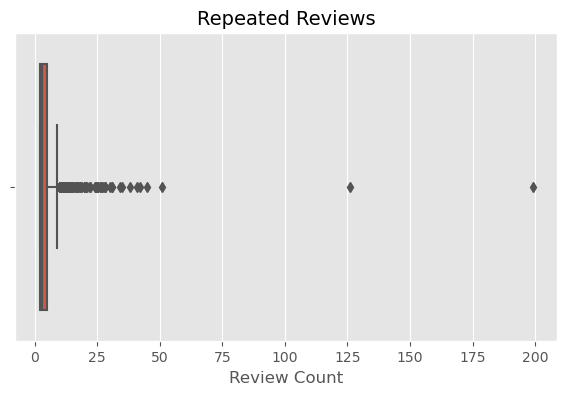

In [19]:
fig = plt.figure(figsize = (7,4))
sns.boxplot(data = count_of_reviews[count_of_reviews['Text']>1], x ='Text') # Any review with count more than 1
plt.title('Repeated Reviews', fontsize = 14, weight = 400)
plt.xlabel('Review Count')
plt.show()

In [20]:
duplicate_sample = count_of_reviews[count_of_reviews['Text']>1].loc[0,'index']
df.loc[df['Text'] == duplicate_sample,['ProductId', 'UserId', 'Score', 'Text']]

,ProductId,UserId,Score,Text
2941,B0002TJAZK,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
2947,B0002TJAZK,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
31782,B00106TG9Y,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
52496,B003ANFMY8,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
52501,B003ANFMY8,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
...,...,...,...,...
499916,B009B87SAC,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
499917,B009B87SAC,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
514140,B003M5VM8O,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."
514690,B003MWGSKY,A3TVZM3ZIXG8YW,1,"This review will make me sound really stupid, ..."


#### This review... does make them sound stupid. 

In [21]:
df = df.drop_duplicates(subset=['Text'])

In [22]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,393579.000000,393579.000000,393579.000000,393579.000000,3.935790e+05
mean,261289.782964,1.733535,2.203708,4.179260,1.296478e+09
std,167028.823852,6.873517,7.535616,1.311983,4.836848e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,112561.500000,0.000000,0.000000,4.000000,1.271462e+09
50%,248705.000000,0.000000,1.000000,5.000000,1.311638e+09
75%,407098.500000,2.000000,2.000000,5.000000,1.332979e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [23]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


### We can see that we have dropped several reviews

In [25]:
# Importing dependencies for Sklearn
from sklearn.model_selection import train_test_split

#### Now let us split the dataset into training and testing set

In [28]:
def get_train_test(df, X_col, y_col):
    X = df[X_col]
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    df_train = pd.concat([X_train, y_train], axis=1).reset_index()
    df_test = pd.concat([X_test, y_test], axis=1).reset_index()
    return df_train, df_test

In [29]:
df_train, df_test = get_train_test(df, 'Text', 'Score')

In [30]:
df_test

,index,Text,Score
0,508413,I have tried just about every gluten free past...,5
1,351680,I routinely purchase my dog treats through Ama...,3
2,206063,I bought this product and love it. I have deci...,5
3,129501,I've been bouncing around from one brand of gr...,4
4,9569,I get these for $4.34 at my local health food ...,5
...,...,...,...
98390,24428,The nuts were stale and tastless. I tried to g...,1
98391,300620,My toy dogs have been on the same kibbles for ...,5
98392,15996,Wow. These things like little pieces of crack ...,5
98393,527966,My two kitties prefer this over Wellness Core ...,5


### Now, we will save these datasets as training and testing datasets

In [34]:
import os

curr_path = os.getcwd()

new_path = os.path.join(curr_path, 'Data_for_model')

In [36]:
df_train.to_csv(os.path.join(new_path, 'train_data.csv'))
df_test.to_csv(os.path.join(new_path, 'test_data.csv'))

In [37]:
df.to_csv(os.path.join(curr_path, 'Cleaned_Data.csv'))